In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
import pandas as pd
import random

<h1> PCA modelos 3D</h1>

In [5]:
landmarking = pd.read_csv("../data_artificial_cites/landmarking_automatico_f&m.csv",index_col=0)

In [6]:
ids = landmarking["id"].values

In [7]:
ids

array(['01-00-F', '01-01-F', '01-02-F', '01-03-F', '01-04-F', '01-05-F',
       '01-06-F', '01-07-F', '01-08-F', '01-09-F', '02-00-F', '02-01-F',
       '02-02-F', '02-03-F', '02-04-F', '02-05-F', '02-06-F', '02-07-F',
       '02-08-F', '02-09-F', '03-00-F', '03-01-F', '03-02-F', '03-03-F',
       '03-04-F', '03-05-F', '03-06-F', '03-07-F', '03-08-F', '03-09-F',
       '04-00-F', '04-01-F', '04-02-F', '04-03-F', '04-04-F', '04-05-F',
       '04-06-F', '04-07-F', '04-08-F', '04-09-F', '05-00-F', '05-01-F',
       '05-02-F', '05-03-F', '05-04-F', '05-05-F', '05-06-F', '05-07-F',
       '05-08-F', '05-09-F', '06-00-F', '06-01-F', '06-02-F', '06-03-F',
       '06-04-F', '06-05-F', '06-06-F', '06-07-F', '06-08-F', '06-09-F',
       '07-00-F', '07-01-F', '07-02-F', '07-03-F', '07-04-F', '07-05-F',
       '07-06-F', '07-07-F', '07-08-F', '07-09-F', '08-00-F', '08-01-F',
       '08-02-F', '08-03-F', '08-04-F', '08-05-F', '08-06-F', '08-07-F',
       '08-08-F', '08-09-F', '09-00-F', '09-01-F', 

In [8]:
landmarking.columns

Index([u'id', u'cloud_X', u'cloud_Y', u'cloud_Z', u'S000_X', u'S001_X',
       u'S002_X', u'S003_X', u'S004_X', u'S005_X', u'S006_X', u'S007_X',
       u'S008_X', u'S009_X', u'S010_X', u'S011_X', u'S012_X', u'S013_X',
       u'S014_X', u'S000_Y', u'S001_Y', u'S002_Y', u'S003_Y', u'S004_Y',
       u'S005_Y', u'S006_Y', u'S007_Y', u'S008_Y', u'S009_Y', u'S010_Y',
       u'S011_Y', u'S012_Y', u'S013_Y', u'S014_Y', u'S000_Z', u'S001_Z',
       u'S002_Z', u'S003_Z', u'S004_Z', u'S005_Z', u'S006_Z', u'S007_Z',
       u'S008_Z', u'S009_Z', u'S010_Z', u'S011_Z', u'S012_Z', u'S013_Z',
       u'S014_Z'],
      dtype='object')

In [9]:
xs = landmarking["cloud_X"].values
ys = landmarking["cloud_Y"].values
zs = landmarking["cloud_Z"].values

In [10]:
xs = np.array(map(lambda x: np.fromstring(x,sep=" "),xs))
ys = np.array(map(lambda x: np.fromstring(x,sep=" "),ys))
zs = np.array(map(lambda x: np.fromstring(x,sep=" "),zs))

In [11]:
max_xs = np.zeros(xs.shape[0])
for i,x in enumerate(xs):
    max_xs.put(i,x.shape[0])
max_len = max_xs.max()
min_len = max_xs.min()
print min_len

67290.0


In [12]:
#alternativa
x_values = []
id_values = []
for _xs,_ys,_zs,_id in zip(xs,ys,zs,ids):
    #person_values = np.zeros(max_len)
    person_values = []
    p_values = np.zeros(max_len*3)
    for x,y,z in zip (_xs,_ys,_zs):
        #id_values.append(_id)
        person_values.append(x)
        person_values.append(y)
        person_values.append(z)
    p_values[0:len(person_values)] = person_values
    x_values.append(p_values)
x_values = np.array(x_values)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [13]:
x_values.shape

(300, 204750)

In [14]:
#pca = decomposition.PCA(n_components=3,svd_solver='randomized')
#for i in range(0,4):
pca = decomposition.PCA(n_components=2,svd_solver='randomized')
pca.fit(x_values)
print "Con n_components = {} el valor es: {} ".format(2,pca.explained_variance_ratio_.sum())

Con n_components = 2 el valor es: 0.924402071255 


In [15]:
x_out = pca.transform(x_values)
x_out.shape

(300, 2)

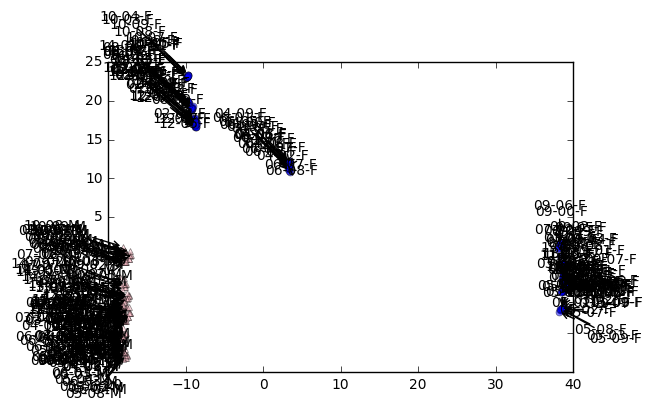

In [17]:

plt.plot(x_out[0:150,0],x_out[0:150,1], 'o', markersize=5, color='blue', alpha=0.5)
plt.plot(x_out[150:300,0],x_out[150:300,1], '^', markersize=5, color='pink', alpha=0.5)
plt.axes().set_aspect('equal')
for label, x, y in zip(ids, x_out[:, 0], x_out[:, 1]):
    text_pos  = random.randint(-20,20)
    plt.annotate(
        label,
        xy = (x, y), xytext = (x+text_pos, y-text_pos),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()